# Regresión Lineal Múltiple

Continuando con ejemplos de regresión lineal, ahora se entrenará un modelo con más de una variable independiente.

## Dataset Propiedades
**Objetivo**: predecir los precios de las propiedades.

El dataset consiste en los anuncios de ventas de Properati de propiedades en la Ciudad de Buenos Aires durante el primer semestre de 2021. La variable a predecir es el precio de la propiedad en dolares y las variables predictoras son:

*  Superficie Total: superficie total de la propiedad en metros cuadrados
*  Superficie Cubierta: superficie cubierta de la propiedad en metros cuadrados
*  Ambientes/Cuartos: cantidad de ambientes/cuartos (excluyendo baños)
*  Baños: cantidad de baños 
*  Tipo de propiedad: si la propiedad es una casa, departamento o propiedad horizontal (PH) 
*  Latitud
*  Longitud
*  Barrio: barrio donde se encuentra la propiedad (l3)

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [406]:
# Procesar dataset original
df = pd.read_csv("./datasets/bsas_realstate_2020.csv")

df_save = df[(df["l2"] == "Capital Federal")].drop(columns=["l1", "l2", "operation_type", "currency"])
df_save.to_csv("datasets/caba_propiedades.csv", index=False)

In [407]:
# Cargar el dataset
df = pd.read_csv("./datasets/caba_propiedades.csv")

## Analisis exploratorio de datos (EDA)

A continuación, se realiza un analisis basico para entender mejor las relaciones entre las variables.

In [408]:
df.head()

,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
4,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92539 entries, 0 to 92538
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       92539 non-null  object 
 1   end_date         92539 non-null  object 
 2   created_on       92539 non-null  object 
 3   lat              87945 non-null  float64
 4   lon              87931 non-null  float64
 5   l3               92539 non-null  object 
 6   rooms            92539 non-null  float64
 7   bedrooms         92539 non-null  float64
 8   bathrooms        90017 non-null  float64
 9   surface_total    83170 non-null  float64
 10  surface_covered  82673 non-null  float64
 11  price            92539 non-null  float64
 12  title            92539 non-null  object 
 13  description      92539 non-null  object 
 14  property_type    92539 non-null  object 
dtypes: float64(8), object(7)
memory usage: 10.6+ MB


In [410]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,87945.000000,87931.000000,92539.00000,92539.000000,90017.000000,83170.000000,82673.000000,9.253900e+04
mean,-34.599162,-58.435884,2.96180,1.957499,1.561694,113.733726,95.019003,2.612721e+05
std,0.023974,0.036392,1.33055,1.088311,0.862656,983.143784,776.554727,3.465733e+05
min,-34.696419,-58.530468,1.00000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613828,-58.459587,2.00000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599543,-58.433710,3.00000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584230,-58.409623,4.00000,3.000000,2.000000,112.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.00000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [411]:
print("Cantidad de nulos:\n", df.isnull().sum())

Cantidad de nulos:
 start_date            0
end_date              0
created_on            0
lat                4594
lon                4608
l3                    0
rooms                 0
bedrooms              0
bathrooms          2522
surface_total      9369
surface_covered    9866
price                 0
title                 0
description           0
property_type         0
dtype: int64


Vemos que hay demasiados valores nulos en las columnas de superficie total y superficie cubierta.

In [412]:
print("Cantidad de datos duplicados:", df.duplicated().sum())

Cantidad de datos duplicados: 1634


In [413]:
# Eliminamos duplicados
df = df.drop_duplicates()
print("Cantidad de datos duplicados:", df.duplicated().sum())

Cantidad de datos duplicados: 0


In [414]:
from importlib import reload

import utils.plot as ploty

reload(ploty)


target = 'price'
features = [col for col in df.columns if col != target]

numerical_features = df.select_dtypes(include="number").drop(columns=target).columns.to_list()
categorical_features = df.select_dtypes(include="object").columns.to_list()

print("Características numéricas:", numerical_features)
print("Características categóricas:", categorical_features)

Características numéricas: ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
Características categóricas: ['start_date', 'end_date', 'created_on', 'l3', 'title', 'description', 'property_type']


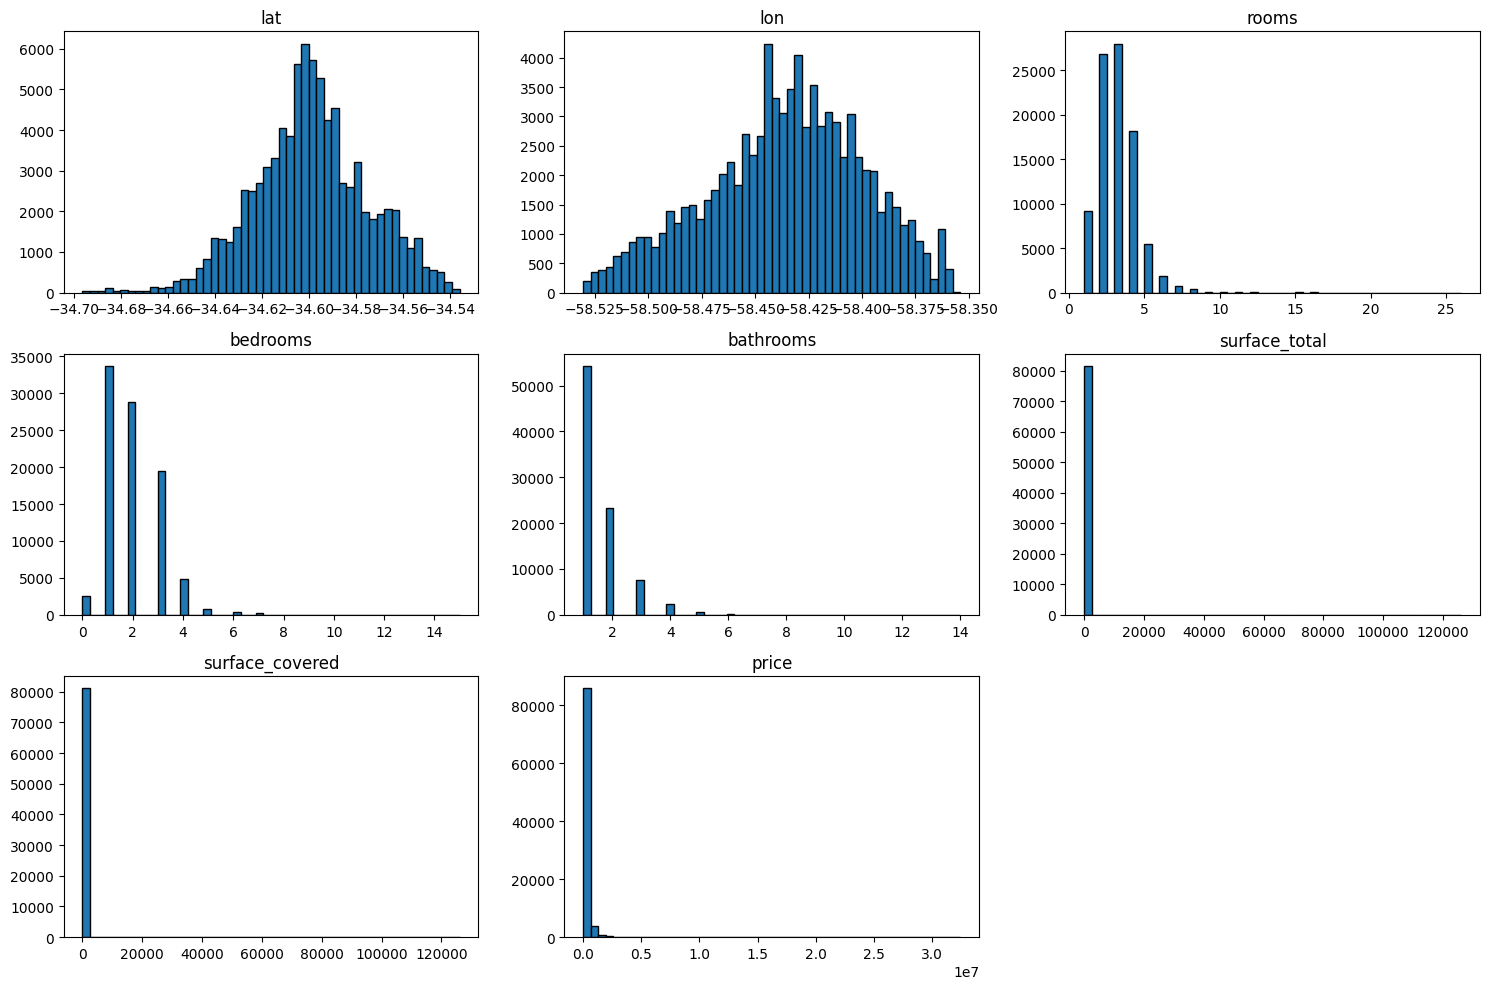

In [415]:
# Graficamos los histogramas de las características y el target
ploty.histogram(df, columns=features+[target], nrow=3, ncol=3)

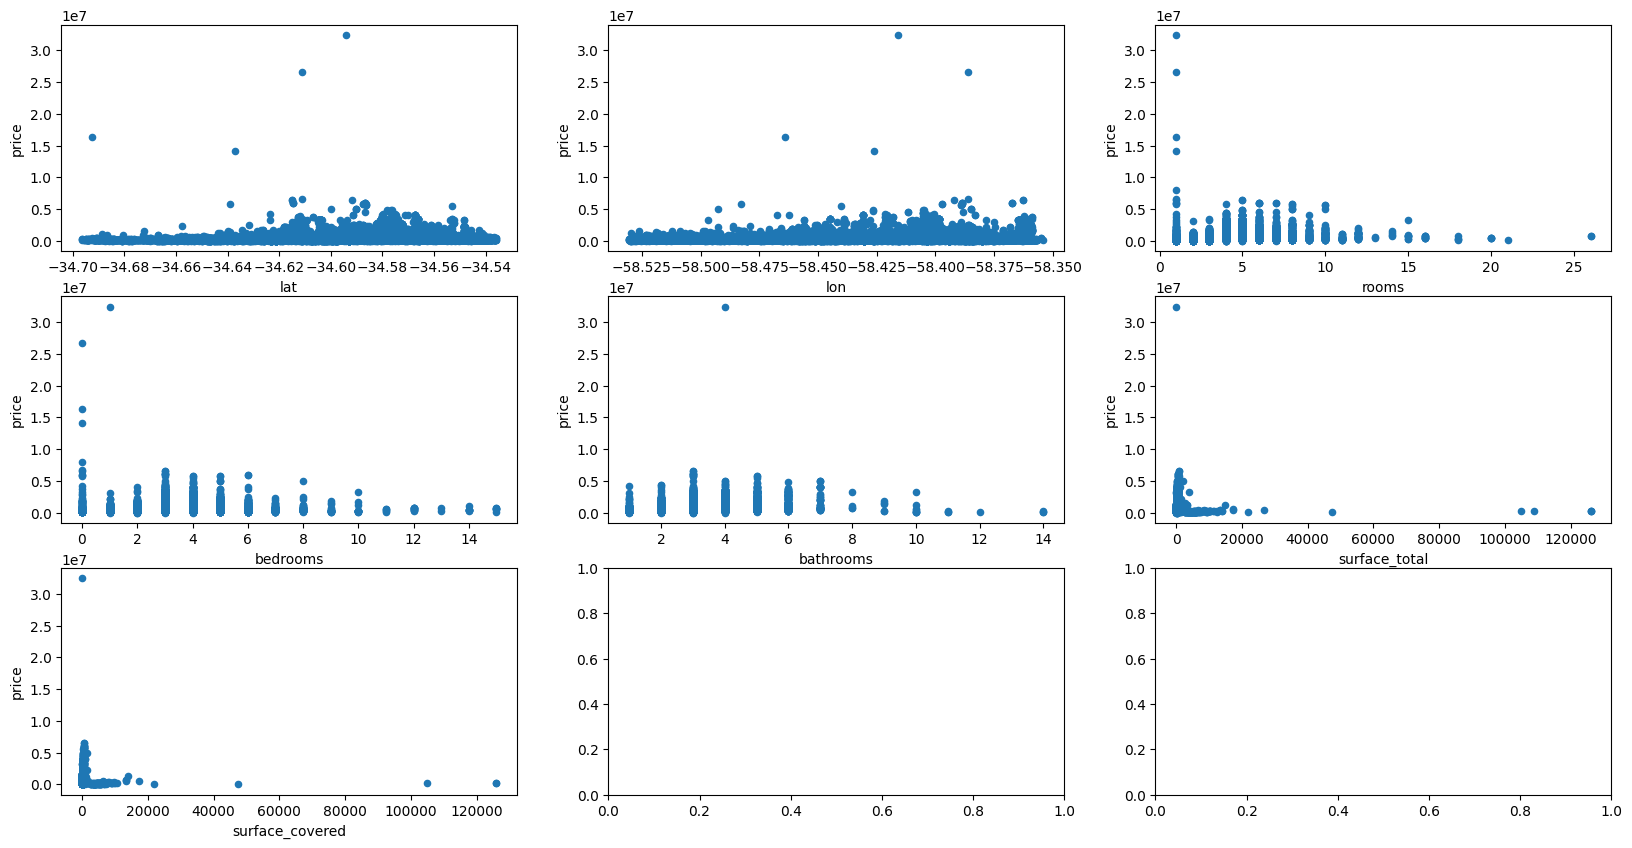

In [416]:
# Gráficos de dispersión entre las características y el target
ploty.scatter(df, numerical_features, target, nrow=3, ncol=3, figsize=(20,10))

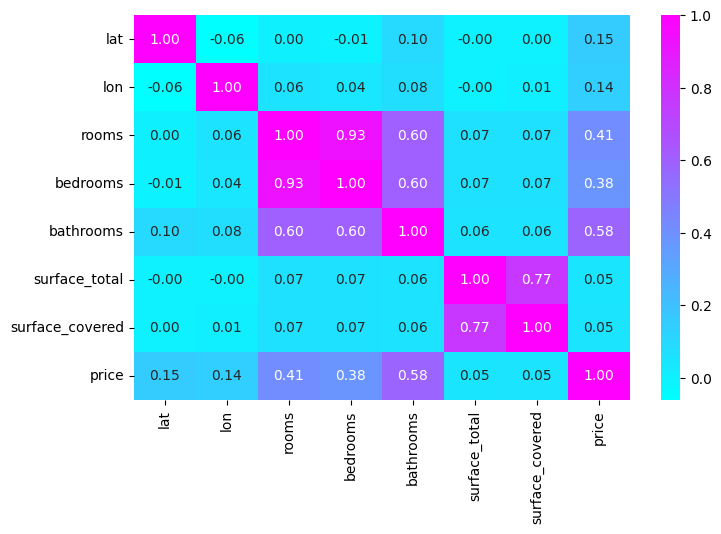

In [417]:
# Graficamos la correlación cruzada
ploty.correlation_heatmap(df[numerical_features+[target]], figsize=(8, 5))

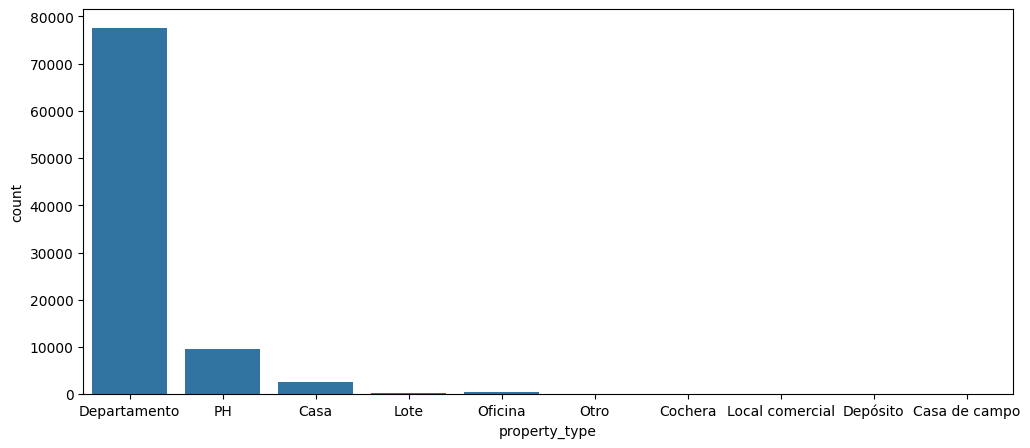

In [418]:
plt.figure(figsize=(12, 5))
sns.countplot(x='property_type', data=df)
plt.show()

In [419]:
df.property_type.value_counts(normalize=True, sort=True)

property_type
Departamento       0.853957
PH                 0.105319
Casa               0.029382
Oficina            0.004785
Lote               0.002673
Otro               0.001254
Cochera            0.001166
Local comercial    0.001122
Depósito           0.000330
Casa de campo      0.000011
Name: proportion, dtype: float64

Se observa que hay muchos valores atipicos los cuales deben tratarse para que el modelo respoda mejor. Ademas solo hay gran concentracion en algunos tipos de propiedad

Tratamiento de outliers

In [420]:
property_type_filter = ["Departamento", "PH", "Casa"]
df = df[df["property_type"].isin(property_type_filter)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89874 entries, 0 to 92538
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       89874 non-null  object 
 1   end_date         89874 non-null  object 
 2   created_on       89874 non-null  object 
 3   lat              85493 non-null  float64
 4   lon              85479 non-null  float64
 5   l3               89874 non-null  object 
 6   rooms            89874 non-null  float64
 7   bedrooms         89874 non-null  float64
 8   bathrooms        87727 non-null  float64
 9   surface_total    81157 non-null  float64
 10  surface_covered  80850 non-null  float64
 11  price            89874 non-null  float64
 12  title            89874 non-null  object 
 13  description      89874 non-null  object 
 14  property_type    89874 non-null  object 
dtypes: float64(8), object(7)
memory usage: 11.0+ MB


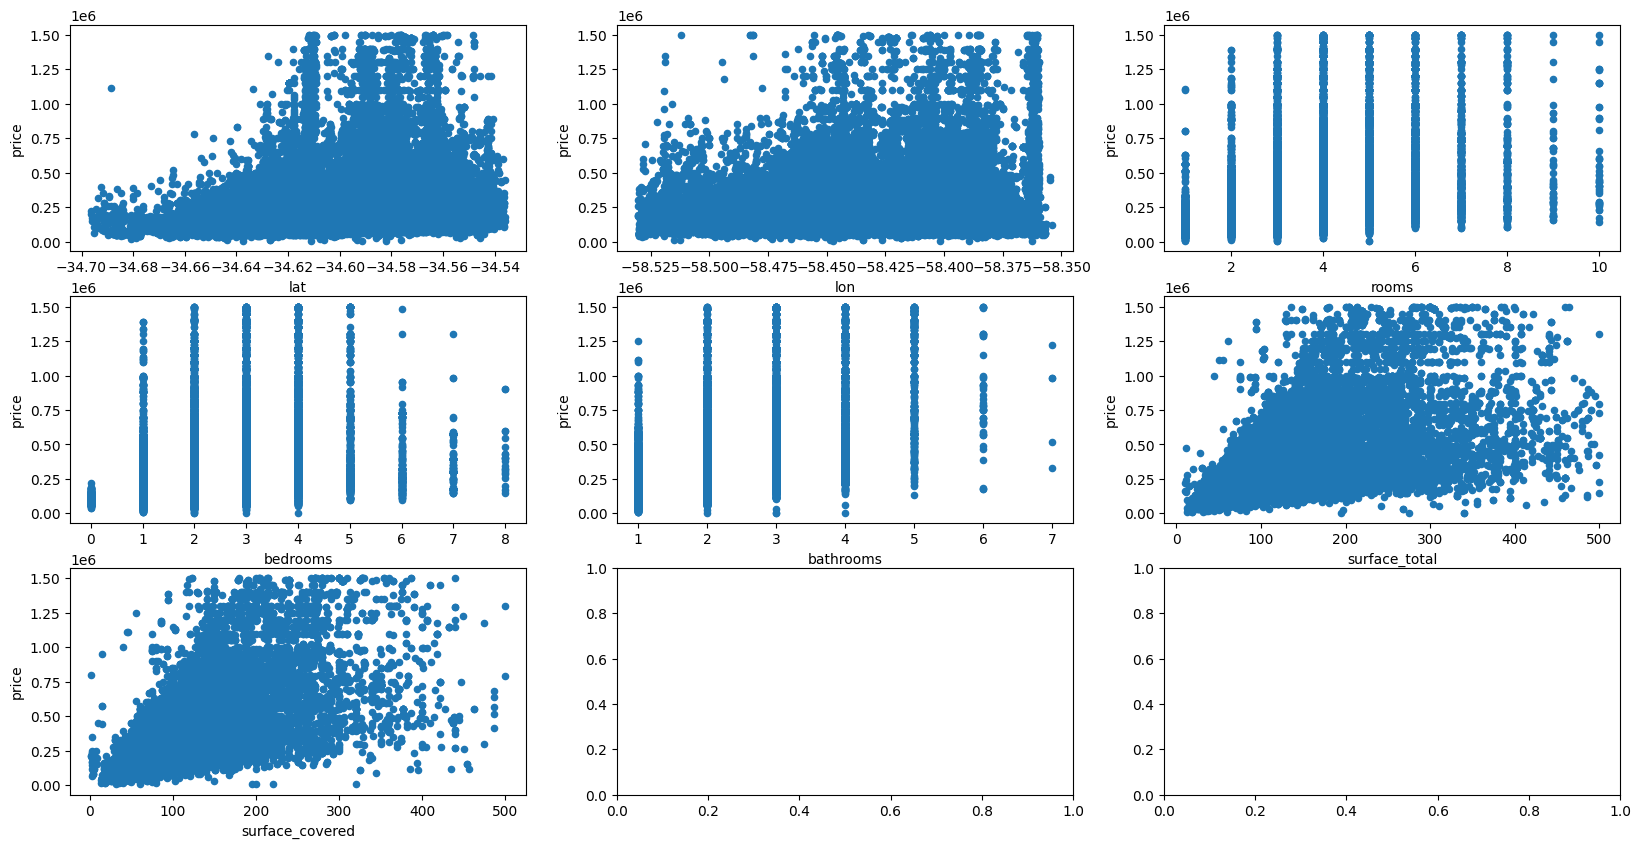

In [421]:
query = "price<=1500000 and surface_total<=500 and surface_covered<=500 and rooms<=10 and bedrooms<=8 and bathrooms<=8"
ploty.scatter(df.query(query), numerical_features, target, nrow=3, ncol=3, figsize=(20,10))

In [422]:
df_filtered = df.query(query)

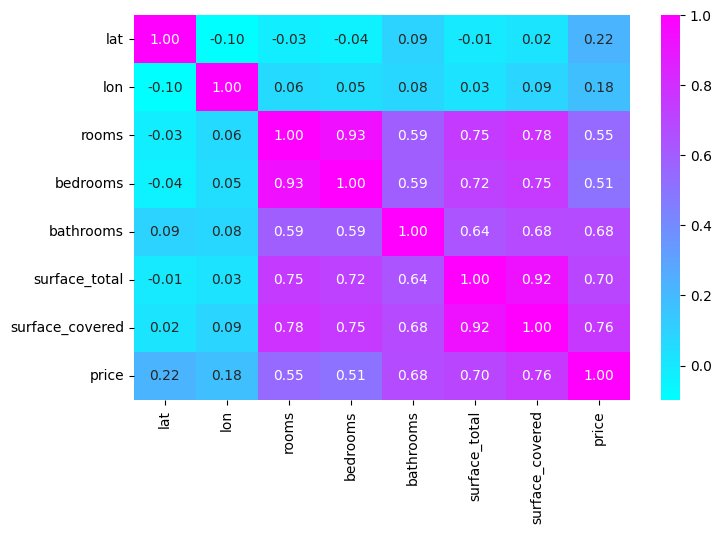

In [423]:
ploty.correlation_heatmap(df_filtered[numerical_features+[target]], figsize=(8, 5))

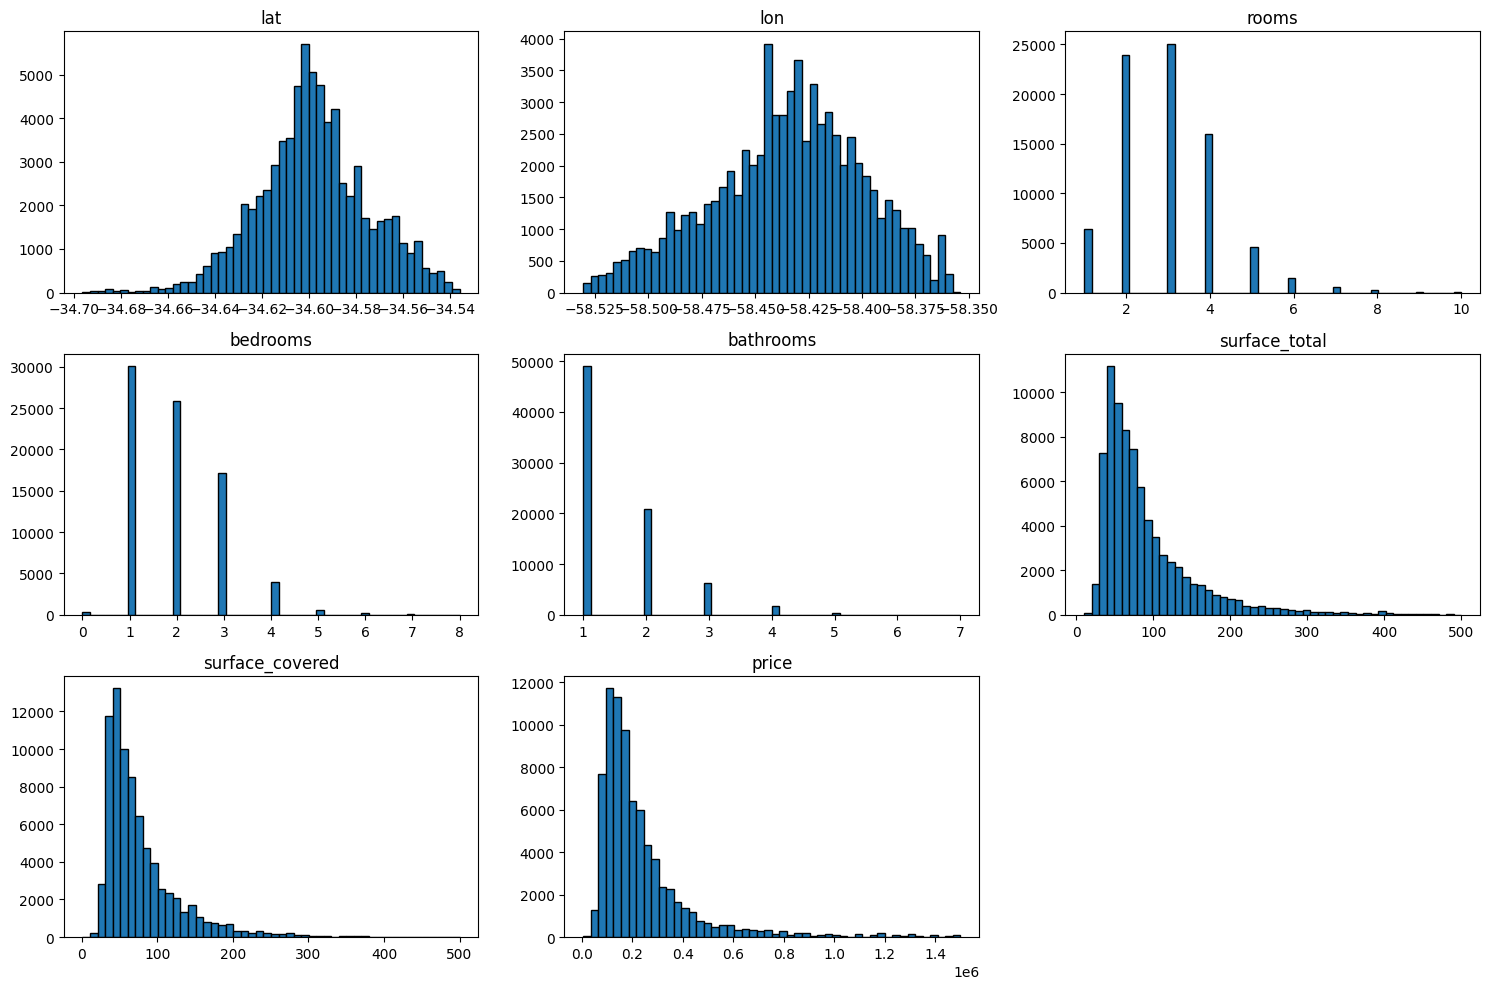

In [424]:
ploty.histogram(df_filtered, columns=features+[target], nrow=3, ncol=3)

In [425]:
print(df_filtered.isnull().sum())

start_date            0
end_date              0
created_on            0
lat                3944
lon                3944
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
title                 0
description           0
property_type         0
dtype: int64


In [426]:
df_filtered = df_filtered.drop(columns=["lat", "lon"])
print(df_filtered.isnull().sum())

start_date         0
end_date           0
created_on         0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
dtype: int64


In [427]:
df_filtered.columns

Index(['start_date', 'end_date', 'created_on', 'l3', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'title',
       'description', 'property_type'],
      dtype='object')

In [428]:
# Filtramos el dataset por las columnas de interes
df_filtered = df_filtered[["rooms", "bathrooms", "surface_total", "surface_covered", "property_type", "price"]]

## Entrenamiento del modelo 

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [430]:
X = df_filtered.drop(columns=["price"])
y = df_filtered['price']

X.shape, y.shape

((78373, 5), (78373,))

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [432]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_features = X_train.select_dtypes(include="number").columns.to_list()

X_train_scaled = scaler.fit_transform(X_train[num_features])
X_test_scaled = scaler.transform(X_test[num_features])

In [433]:
from sklearn.preprocessing import OneHotEncoder

cat_features = X_train.select_dtypes(include="object").columns.to_list()

one_hot_encoder = OneHotEncoder(sparse_output=False)

X_train_scaled_cat = one_hot_encoder.fit_transform(X_train[cat_features])
X_test_scaled_cat = one_hot_encoder.transform(X_test[cat_features])

In [434]:
one_hot_encoder.get_feature_names_out(cat_features)

array(['property_type_Casa', 'property_type_Departamento',
       'property_type_PH'], dtype=object)

In [435]:
X_train = np.concatenate([X_train_scaled, X_train_scaled_cat], axis=1)
X_test = np.concatenate([X_test_scaled, X_test_scaled_cat], axis=1)

X_train.shape, X_test.shape

((54861, 7), (23512, 7))

In [436]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Validación del modelo

In [437]:
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

#### Entrenamiento

In [438]:
print(f"El coeficiente de Pearson es {round(model.score(X_train, y_train), 2)}")

El coeficiente de Pearson es 0.67


In [439]:
y_train_pred = model.predict(X_train)

r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = root_mean_squared_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

R2: 0.668
Error absoluto medio (MAE): 68075.362
Error cuadrático medio (MSE): 13056362250.635
Raíz de error cuadrático medio (RMSE): 114264.44
Error absoluto porcentual medio (MAPE): 31.32%


#### Evaluación

In [440]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

R2: 0.667
Error absoluto medio (MAE): 68264.367
Error cuadrático medio (MSE): 13373362546.938
Raíz de error cuadrático medio (RMSE): 115643.256
Error absoluto porcentual medio (MAPE): 30.90%


## (Bonus) Uso de pipeline para preprocesamiento

In [441]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Creamos el preprocesamiento para las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features), 
        ('num', StandardScaler(), num_features)   
    ]
)

# Pipeline: preprocesamiento + modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [443]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [444]:
print(f"El coeficiente de Pearson es {round(pipeline.score(X_train, y_train), 3)}")

y_train_pred = pipeline.predict(X_train)

r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = root_mean_squared_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

El coeficiente de Pearson es 0.668
R2: 0.668
Error absoluto medio (MAE): 68075.362
Error cuadrático medio (MSE): 13056362250.635
Raíz de error cuadrático medio (RMSE): 114264.44
Error absoluto porcentual medio (MAPE): 31.32%


In [445]:
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

R2: 0.667
Error absoluto medio (MAE): 68264.367
Error cuadrático medio (MSE): 13373362546.938
Raíz de error cuadrático medio (RMSE): 115643.256
Error absoluto porcentual medio (MAPE): 30.90%
